<a href="https://colab.research.google.com/github/rezkydp/Percobaan-Ke-2/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **K-Means Clustering**

- K Means allows us to define the required number of clusters
- Now we first start by taking an arbitrary number of k. Let’s say we take k=3 (k is choosen from **elbow method**)
- Algorithm chooses three random points as the centroid
- It also computes Euclidean distances from the centroid to all other data points
- The algorithm after measuring the distances of all the data points from the centroid associates each data point with a centroid based on its proximity
- To measure how good the three clusters are seperated, we use **Silhouette Score**

#### **Elbow Method**
- In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS(Within-Cluster Sum of Square)
- **WCSS is the sum of squared distance between each point and the centroid in a cluster**
- WCSS value is largest when K = 1.

####  **Silhouette Score**
- Clusters are well apart from each other as the silhouette score is closer to 1
- Silhouette Coefficient score is a metric used to calculate the goodness of a clustering technique
- Its value ranges from -1 to 1.
  1. **Score = 1: Means clusters are well apart** from each other and clearly distinguished.
  2. **Score = 0: Means clusters are indifferent**, or we can say that the distance between clusters is not significant.
  3. **Score = -1: Means clusters are assigned in the wrong way.**

In [1]:
# Importing Libraries
from sklearn import datasets,metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import silhouette_score
import pandas as pd
from scipy.spatial import distance # To calculate distances
from google.colab import files
from IPython.display import Image

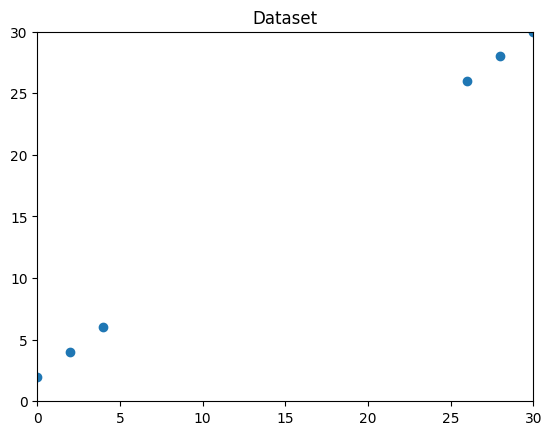

In [7]:
# Lets take an small example
x_axis = np.array([0,2,4,26,28,30])
y_axis = np.array([2,4,6,26,28,30])

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

plt.plot()
plt.xlim([0,30])
plt.ylim([0,30])
plt.title('Dataset')
plt.scatter(x_axis,y_axis)
plt.show()

In [3]:
print('For ONE Cluster, all data points should be assigned to 1 Cluster\n')

kmeans = KMeans(n_clusters = 1, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For ONE Cluster, all data points should be assigned to 1 Cluster

Clusters assigned to each datapoints :
0    0
1    0
2    0
3    0
4    0
5    0
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 1760.0


In [4]:
print('For TWO Cluster, all data points should be assigned to 2 Clusters\n')

kmeans = KMeans(n_clusters = 2, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For TWO Cluster, all data points should be assigned to 2 Clusters

Clusters assigned to each datapoints :
0    1
1    1
2    1
3    0
4    0
5    0
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 32.0


In [5]:
print('For THREE Cluster, all data points should be assigned to 3 Clusters\n')

kmeans = KMeans(n_clusters = 3, max_iter = 100).fit(data)
data['clusters'] = kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])
print('\nSum of Square Error/ WCSS is :',kmeans.inertia_)

For THREE Cluster, all data points should be assigned to 3 Clusters

Clusters assigned to each datapoints :
0    0
1    0
2    2
3    1
4    1
5    1
Name: clusters, dtype: int32

Sum of Square Error/ WCSS is : 20.0


WCSS Formula

In K Means, Distance measure is Euclidean Distance Metric


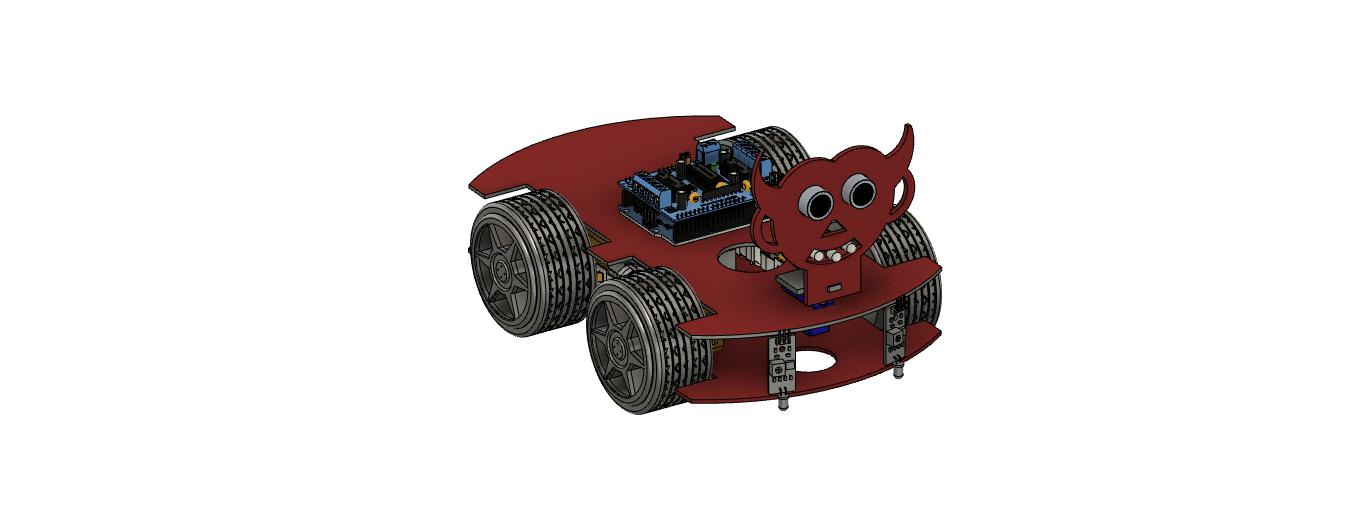

In [22]:
print('WCSS Formula\n')
print('In K Means, Distance measure is Euclidean Distance Metric')
Image('CaseRobotika_v1.jpg')

For cluster = 1, SSE/WCSS is 1910.0
For cluster = 2, SSE/WCSS is 32.0
For cluster = 3, SSE/WCSS is 20.0
For cluster = 4, SSE/WCSS is 8.0
For cluster = 5, SSE/WCSS is 4.0


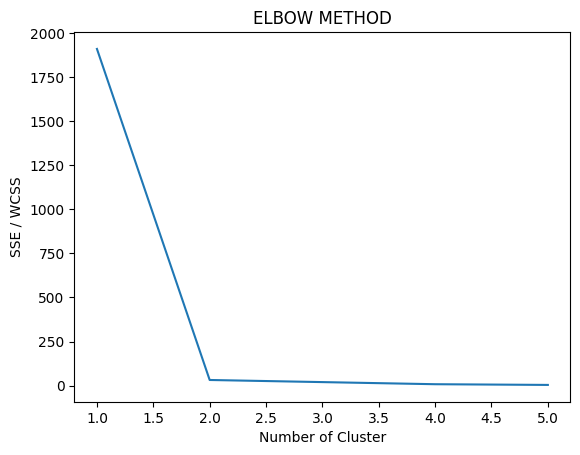

Optimum Number of Cluster : 2


In [23]:
# ELBOW METHOD

# How many clusters should we choose ? - Elbow Method
# Select the elbow point for number of clusters
data = pd.DataFrame({'x':x_axis, 'y':y_axis})

sse = {}

for k in range(1,6): # Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(data)
  data['clusters'] = kmeans.labels_
  sse[k] = kmeans.inertia_
  print("For cluster = {}, SSE/WCSS is {}".format(k, sse[k]))

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE / WCSS")
plt.title("ELBOW METHOD")
plt.show()

print('Optimum Number of Cluster : 2')

#### **Silhouette Score**
- It refers to a method of interpretation and validation of consistency within clusters of data.
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate.
- If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

Silhouette Score Example



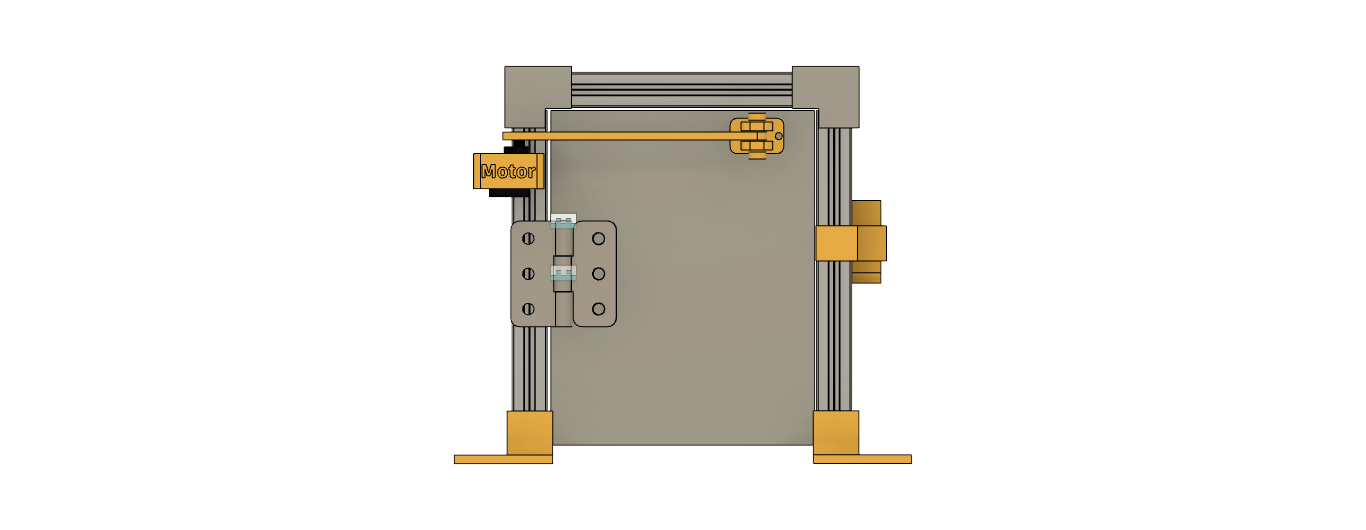

In [25]:
print('Silhouette Score Example\n')
Image('PintuPCD_v7.png',height = 300)

In [26]:
# Silhouette Score

data = pd.DataFrame({'x':x_axis, 'y':y_axis})

for n_clusters in range(0,6):# Maximum range should be 6, as it contains only 6 data points
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(data)
  label = kmeans.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(n_clusters,sil_coeff))

print('\n It is same for every cluster, so choose from Elbow Method')

For cluster= 0, Silhouette Coefficient is 0.08333333333333333
For cluster= 1, Silhouette Coefficient is 0.08333333333333333
For cluster= 2, Silhouette Coefficient is 0.08333333333333333
For cluster= 3, Silhouette Coefficient is 0.08333333333333333
For cluster= 4, Silhouette Coefficient is 0.08333333333333333
For cluster= 5, Silhouette Coefficient is 0.08333333333333333

 It is same for every cluster, so choose from Elbow Method
